# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Solução do problema com dependência do statsmodels

### Importando bibliotecas

https://pandas.pydata.org/

https://www.numpy.org/

https://seaborn.pydata.org/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import statsmodels

In [3]:
print('Versão do pandas -> %s' %pd.__version__)
print('Versão do numpy -> %s' %np.__version__)
print('Versão do seaborn -> %s' %sns.__version__)
print('Versão do scipy -> %s' %scipy.__version__)
print('Versão do statsmodels -> %s' %statsmodels.__version__)

Versão do pandas -> 2.3.1
Versão do numpy -> 2.0.2
Versão do seaborn -> 0.13.2
Versão do scipy -> 1.13.1
Versão do statsmodels -> 0.14.5


In [4]:
import statsmodels.api

### Lendo o dataset do projeto

In [5]:
dados = pd.read_csv(r'C:\Users\LMMARTINHO\OneDrive - Tereos\Área de Trabalho\Courses\Statistics\dados.csv')

In [6]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---

# <font color=green>2 RODANDO UMA REGRESSÃO LINEAR</font>
***

## Dataset de exemplo
> ### $Y$ = Gasto das famílias
> ### $X$ = Renda das Famílias

In [7]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [8]:
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [9]:
dataset.shape

(50, 2)

### Estatísticas descritivas

In [10]:
dataset.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


### Análise gráfica

https://seaborn.pydata.org/generated/seaborn.boxplot.html

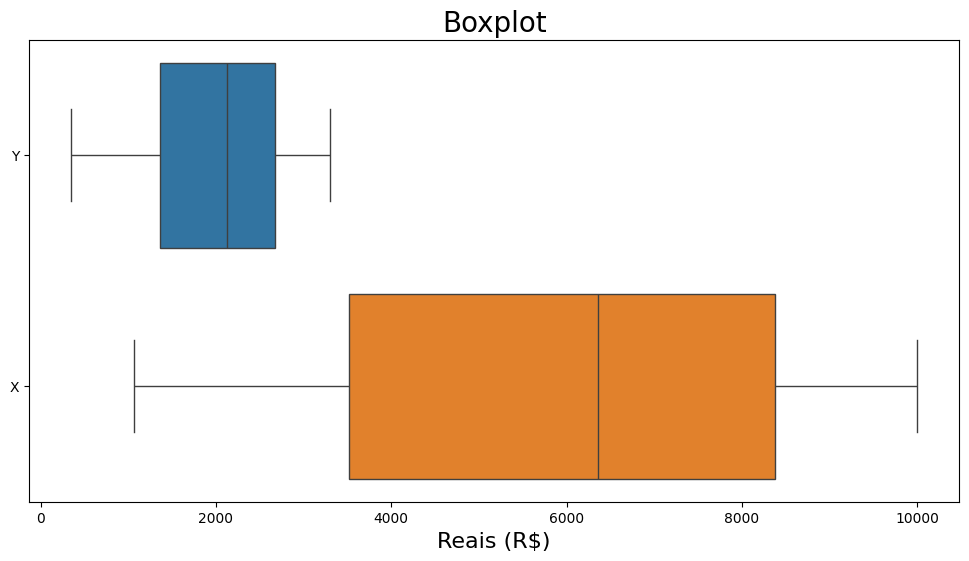

In [11]:
ax = sns.boxplot(dataset, orient='h')
ax.set_title('Boxplot', fontsize = 20)
ax.set_xlabel('Reais (R$)', fontsize = 16)
ax.figure.set_size_inches(12,6)

https://seaborn.pydata.org/generated/seaborn.lmplot.html

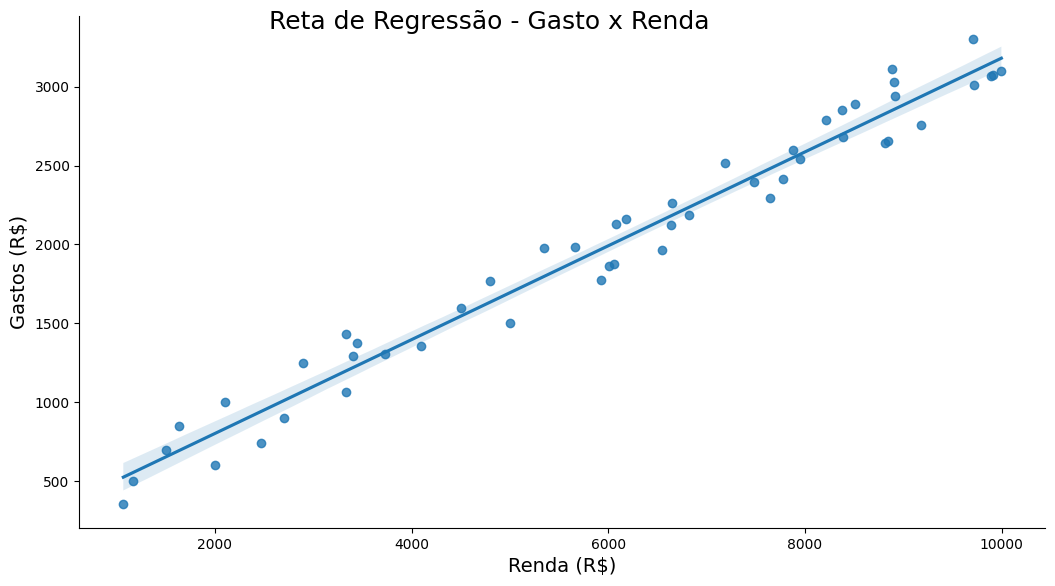

In [12]:
ax = sns.lmplot(x = 'X', y= 'Y', data = dataset)
ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Reta de Regressão - Gasto x Renda', fontsize = 18)
ax.set_xlabels('Renda (R$)', fontsize =  14)
ax.set_ylabels('Gastos (R$)', fontsize = 14)

### Análise da correlação

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [13]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


### Modelo de regressão linear simples

https://www.statsmodels.org/stable/regression.html

In [14]:
import statsmodels.api as sm

In [15]:
Y = dataset['Y']
X = sm.add_constant(dataset['X'])

In [16]:
Y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [17]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


### Estimando o modelo

In [18]:
resultado_regressao = sm.OLS(Y,X).fit()

In [19]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           3.56e-38
Time:                        17:23:14   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

### Obtendo as previsões dentro da amostra

In [20]:
dataset['Y previsto'] = resultado_regressao.predict()
dataset

,Y,X,Y previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


---

# <font color=green>3 CORRELAÇÃO</font>
***

## <font color=green>3.1 Covariância</font>
***

A covariância, ou variância conjunta, é a medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis. É definida da seguinte maneira:

### Covariância populacional

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

### Covariância amostral

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

### Gerando uma amostra aleatória para facilitar o entendimento

In [21]:
amostra = dados.query('Renda < 5000').sample(n=20, random_state = 101)
amostra

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
5051,14,0,39,8,6,1500,1.616243
72082,52,0,29,8,7,1000,1.752518
5521,15,1,21,8,12,3500,1.694016
13849,22,0,49,2,13,1570,1.804156
14285,22,0,29,8,9,600,1.785481
57207,41,1,34,2,12,1200,1.746864
14720,23,0,32,4,12,2000,1.663362
17552,23,0,32,8,6,500,1.693730
49020,35,0,24,6,7,1300,1.656948
2852,13,0,53,8,5,600,1.667109


### Obtendo a matriz de covariância

In [22]:
## Só faz sentido analisar variáveis contínuas

amostra[['Idade','Renda','Anos de Estudo', 'Altura']].cov()

## A covariância é expressa em medidas da unidade da variável, por isso é difícil interpretar se 4947 é maior que 2209 (mais relação), pois se a variável idade
## tem um range maior que o anos de estudo, isso impacta na covariância. Mas podemos interpretar os sinais dessa covariância.

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


### Identificando as variâncias na diagonal principal da matriz

In [23]:
## Se eu substituir na fórmula acima o Y pelo X (ou seja, a diagonal principal da matriz acima), eu tenho a mesma fórmula da variância

amostra.Idade.var()

np.float64(134.4105263157895)

## <font color=green>3.2 Interpretação da Covariância</font>
***

Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

### Verificando a existência de uma associação linear negativa

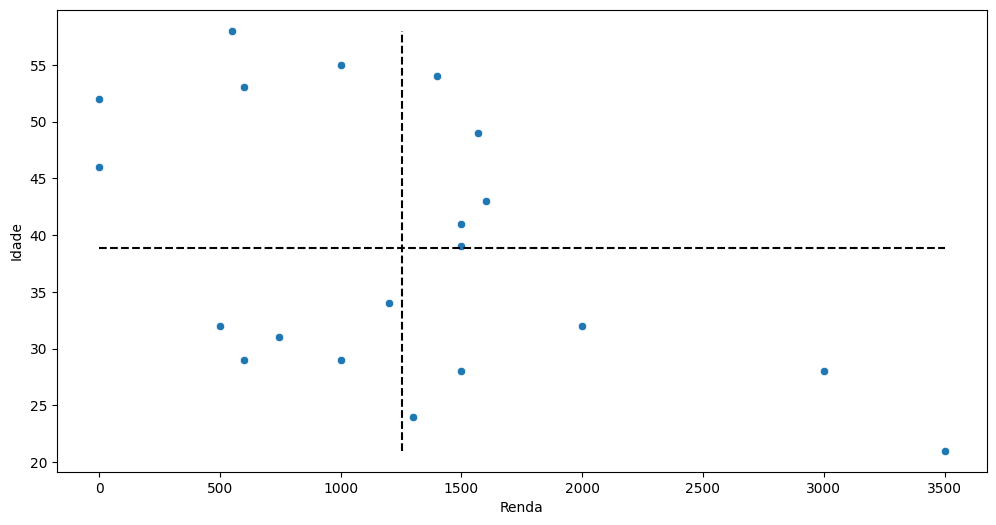

In [24]:
x = amostra['Renda']
y = amostra['Idade']

ax = sns.scatterplot(x = x, y = y)
ax.figure.set_size_inches(12,6)
ax.hlines(y = y.mean(), xmin= x.min(), xmax=x.max(), colors='black',linestyles='dashed')
ax.vlines(x = x.mean(), ymin= y.min(), ymax=y.max(), colors='black',linestyles='dashed')

### Verificando a existência de uma associação linear positiva

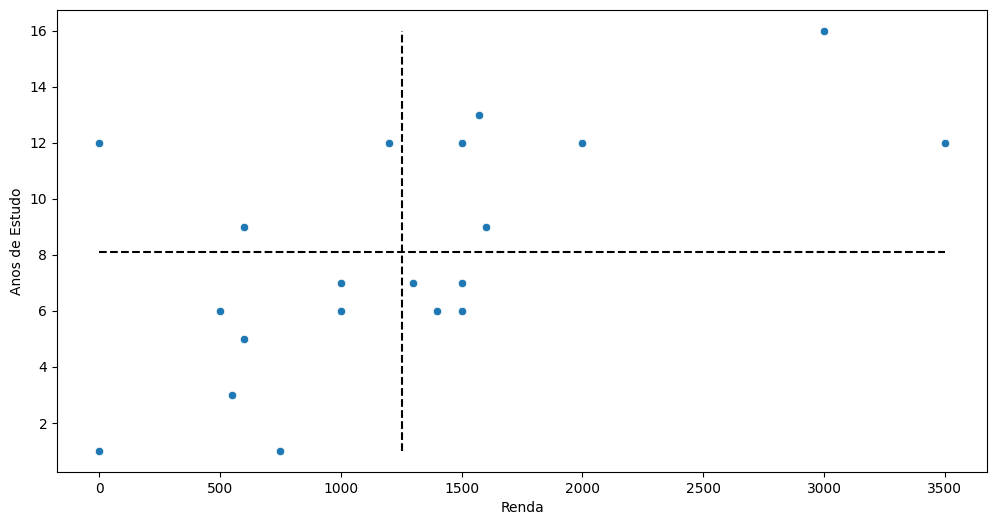

In [25]:
x = amostra['Renda']
y = amostra['Anos de Estudo']

ax = sns.scatterplot(x=x,y=y)
ax.figure.set_size_inches(12,6)
ax.hlines(y=y.mean(), xmax=x.max(), xmin=x.min(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymax=y.max(), ymin=y.min(), colors='black', linestyles='dashed')

### Verificando a inexistência de uma associação linear entre as variáveis

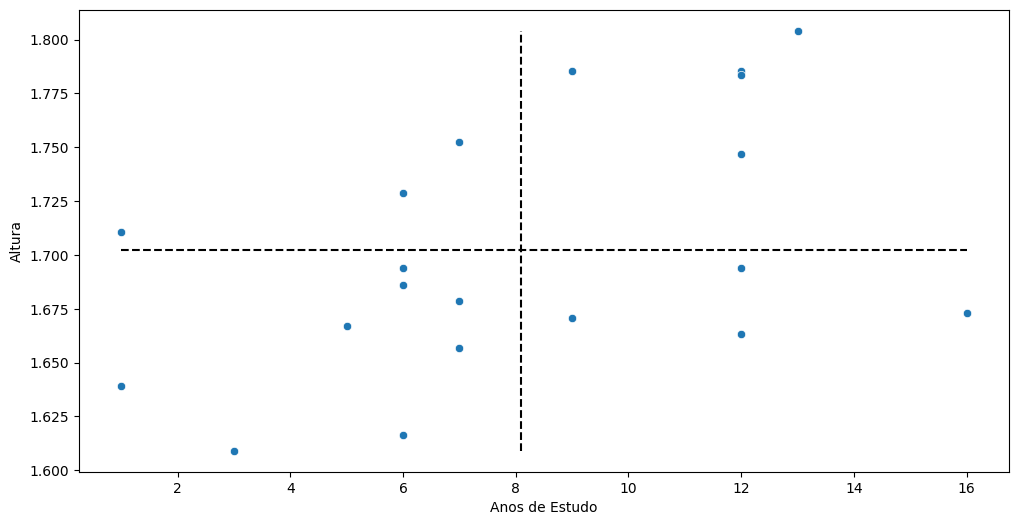

In [26]:
x = amostra['Anos de Estudo']
y = amostra['Altura']

ax = sns.scatterplot(x=x,y=y)
ax.figure.set_size_inches(12,6)
ax.hlines(y=y.mean(), xmax=x.max(), xmin=x.min(), colors='black', linestyles='dashed')
ax.vlines(x=x.mean(), ymax=y.max(), ymin=y.min(), colors='black', linestyles='dashed')

### <font color='red'>Observação Importante:</font>
> Pelo que foi apresentado pode parecer que valores elevados, tanto positivos quanto negativos, para a covariância indicam relações lineares fortes entre as variáveis envolvidas. No entanto, um problema quando se usa a covariância como uma medida da intensidade da relação linear é que o valor da covariância depende das unidades de medida para x e y.
> 
> Uma medida da relação entre duas variáveis que não é afetada pelas unidades de medida para x e y é o coeficiente de correlação que veremos no próximo tópico.

## <font color=green>3.3 Coeficiente de correlação de Pearson</font>
***

É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.

O coeficiente de correlação varia de -1 a +1. Valores que se aproximam de -1 ou +1 indicam uma relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca será a relação.

Um ponto importante é que o coeficiente de correlação é uma medida de associação linear e não necessariamente de causação. Uma correlação alta entre duas variáveis não significa, necessariamente, que variações em uma delas provocará alterações na outra.

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Coeficiente de correlação de Pearson - dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

### Obtendo $s_{xy}$

In [27]:
s_xy = dados[['Altura','Renda']].cov()
s_xy

,Altura,Renda
Altura,0.006355,-1.078964e+00
Renda,-1.078964,1.104491e+07


In [28]:
s_xy = s_xy['Altura'].loc['Renda']
s_xy

np.float64(-1.0789639314252728)

### Obtendo $s_x$ e $s_y$

In [29]:
s_x = dados['Altura'].std()
s_y = dados['Renda'].std()
print(s_x)
print(s_y)

0.07971743006825292
3323.3877303464037


### Obtendo o coeficiente de correlação $r_{xy}$

In [30]:
rxy = s_xy / (s_x * s_y)
rxy

np.float64(-0.004072608143400292)

### Obtendo uma matriz de correlação com o Pandas

In [31]:
dados[['Altura','Renda']].corr()

,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


In [32]:
dataset[['X','Y']].corr()  ## y: gasto e x: renda da familia

,X,Y
X,1.000000,0.984835
Y,0.984835,1.000000


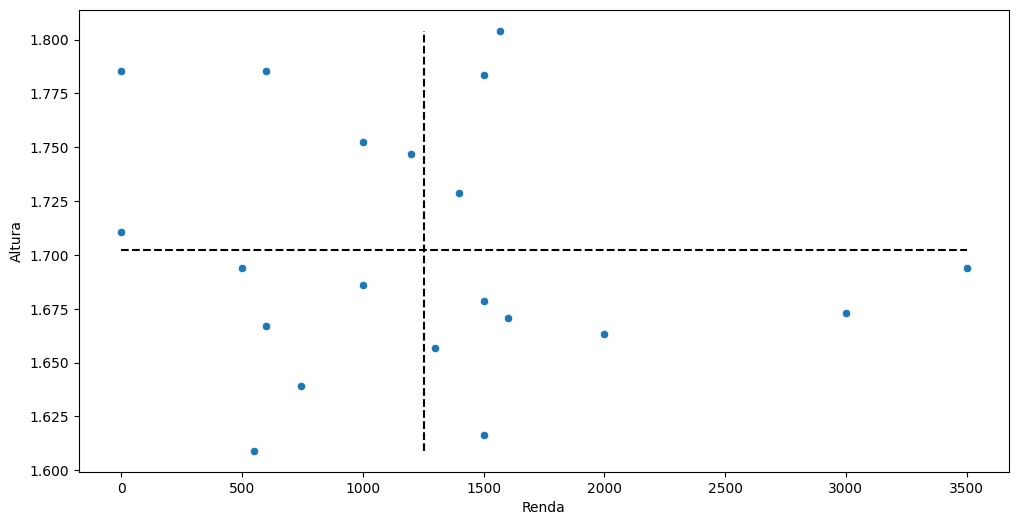

In [33]:
x = amostra['Renda']
y = amostra['Altura']

ax = sns.scatterplot(x=x,y=y)
ax.figure.set_size_inches(12,6)
ax.hlines( y = y.mean(), xmax= x.max(), xmin=x.min(), colors='black', linestyles='dashed')
ax.vlines( x = x.mean(), ymax= y.max(), ymin=y.min(), colors='black', linestyles='dashed')

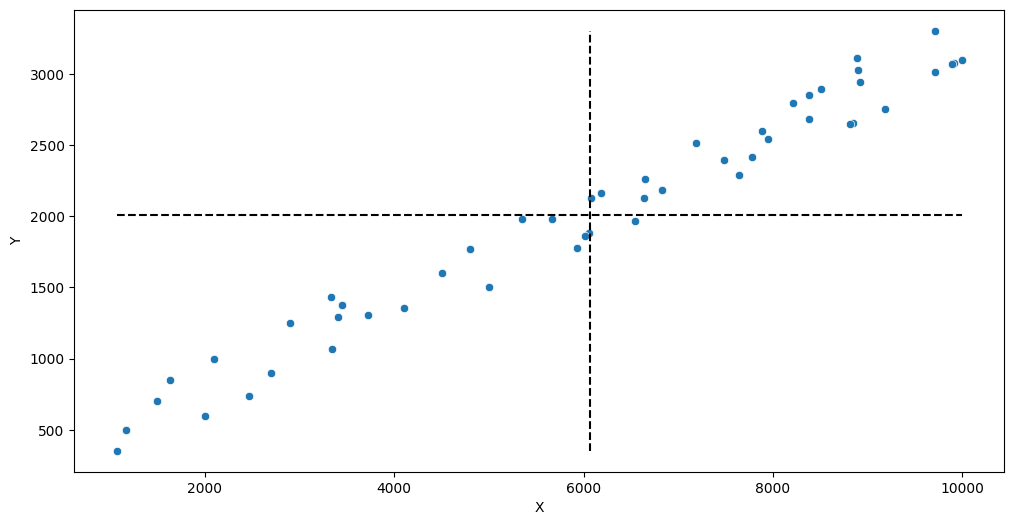

In [34]:
x = dataset['X']
y = dataset['Y']

ax = sns.scatterplot(x=x,y=y)
ax.figure.set_size_inches(12,6)
ax.hlines( y = y.mean(), xmax= x.max(), xmin=x.min(), colors='black', linestyles='dashed')
ax.vlines( x = x.mean(), ymax= y.max(), ymin=y.min(), colors='black', linestyles='dashed')

---

# <font color=green>4 REGRESSÃO LINEAR</font>
***

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

#### Terminologia

> A variável que é prevista é conhecida como variável dependente (*Y*).

> A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).

Em nosso treinamento vamos abordar o tipo mais simples de análise de regressão que considera uma variável dependente e apenas uma variável independente onde a relação entre as variáveis se aproxima de uma linha reta.

## <font color=green>4.1 Regressão linear simples</font>
***

### Função consumo

Um economista famoso do passado concluiu em um de seus estudos que os indivíduos tendem a aumentar o seu consumo conforme sua renda aumenta. Logicamente esta teoria ganhou um pouco mais de complexidade, mas vamos utilizar sua forma mais simples para entender o procedimento de análise de regressão com a seguninte formulação:

# $$Y_i = \beta_1 + \beta_2X_i$$

Onde

- $Y_i$ é o gasto das famílias ou consumo das famílias

- $X_i$ é a renda disponível

- $\beta_1$ é conhecido como intercepto (no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)

- $\beta_2$ é o coefiente angular (no modelo teórico é a propensão marginal a consumir)

Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros $\beta_1$ e $\beta_2$ com base nas observações de $Y$ e $X$.

### Carregando o dataset

In [35]:
dataset.drop(['Y previsto'], axis = 1, inplace=True)

In [36]:
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


### Identificando a relação entre as variáveis

https://seaborn.pydata.org/generated/seaborn.lmplot.html

Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.

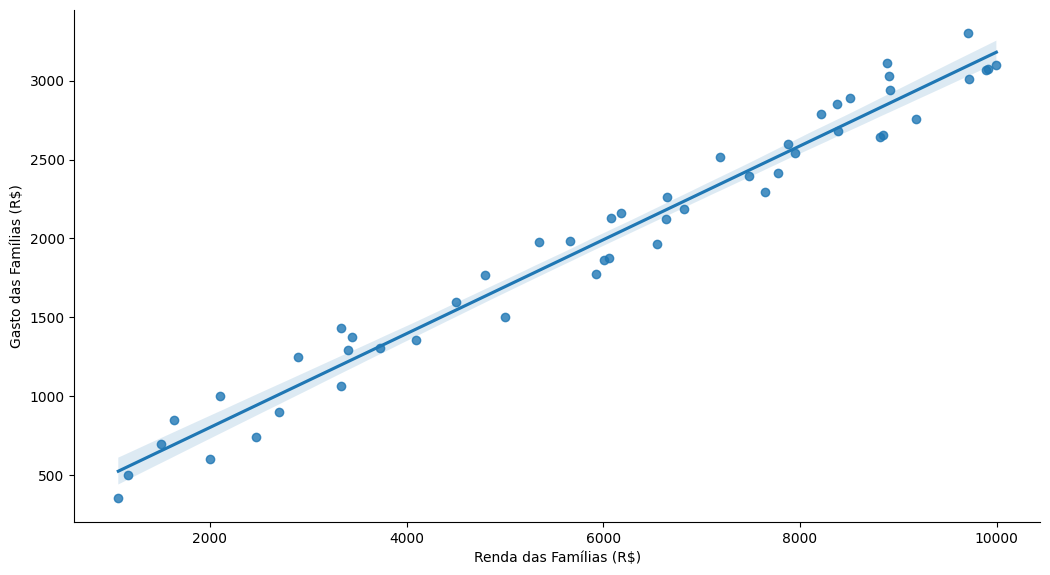

In [37]:
## Antes de tudo, devo fazer uma análise gráfica para ver se tem uma relação linear entre duas variáveis

ax = sns.lmplot(x = 'X', y = 'Y', data=dataset)
ax.figure.set_size_inches(12,6)
ax.set_xlabels('Renda das Famílias (R$)')
ax.set_ylabels('Gasto das Famílias (R$)')

### Matriz de correlação

In [38]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


### Função de regressão populacional

A equação formulada acima é conhecida como **função de regressão populacional (FRP)** e em alguns livros é também representada da seguinte forma:

# $$E(Y|X_i) = \beta_1 + \beta_2X_i$$

Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$, tem uma relação funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. O coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes de regressão e também são conhecidos como intercepto e coeficiente angular, respectivamente.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

O gráfico de dispersão acima deixa claro que com o aumento da renda familiar, em média, as despesas de consumo das famílias aumentam, mas não no mesmo nível. O que podemos dizer é que para um nível de renda $X_i$ as despesas médias de consumo de uma
família agrupam-se em torno do consumo médio de todas as famílias deste nível $X_i$, isto é, em torno de sua esperança condicional $E(Y|X_i)$. Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu valor esperado da seguinte forma:

# $$u_i = Y_i - E(Y|X_i)$$

ou

# $$Y_i = E(Y|X_i) + u_i$$

onde o desvio $u_i$ é uma variável aleatória não-observável que assume valores positivos ou negativos. Esta variável é também cohecida como termo de erro estocástico.

Observe que a podemos representar a FRP em sua forma estocástica da seguinte maneira:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

## <font color=green>4.2 O método de mínimos quadrados</font>
***

Considere a seguinte **função de regressão da população (FRP)** para duas variáveis:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Como a **FRP** não pode ser obtida de forma direta, precisamos estimá-la através da **função de regressão amostral (FRA)**.

# $$Y_i = \hat{\beta}_1 + \hat{\beta}_2X_i + \hat{u}_i$$
# $$Y_i = \hat{Y}_i + \hat{u}_i$$

onde $\hat{Y}_i$ é o valor estimado de $Y_i$.

A partir da equação acima podemos expressar o erro da seguinte maneira:

# $$\hat{u}_i = Y_i - \hat{Y}_i$$
# $$\hat{u}_i = Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i$$

A ideia é determinar **FRA** de forma que fique o mais próximo possível do valor observado de $Y$. Intuitivamente uma forma interessante de fazer isso seria determinar **FRA** de maneira que a soma dos resíduos seja a menor possível.

# $$\sum\hat{u}_i = \sum{(Y_i - \hat{Y}_i)}$$

Avaliando a figura abaixo se pode verificar que talvez o critério de minimizar a soma dos resíduos não seja a melhor abordagem para solucionar o problema.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

O critério de minimização da soma dos resíduos assume que todos os resíduos tem o mesmo peso no somatório, o que nem sempre se comprova. Em nosso exemplo os resíduos $\hat{u}_1$ e $\hat{u}_4$ encontram-se bem mais afastados da **FRA** que $\hat{u}_2$ e $\hat{u}_3$. Isso acarreta na possibilidade de que a soma dos $\hat{u}_i$'s seja bastante pequena e até mesmo nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar tal problema adotou-se o critério de minimização da soma dos quadrados dos resíduos que é conhecido como **Método de Mínimos Quadrados**.

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$
# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i)^2}$$

Após um procedimento de diferenciação, algumas simplificações e manipulações algébricas obtemos os **estimadores de mínimos quadrados**.

$$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$

## <font color=green>4.3 Estimadores de mínimos quadrados ordinários</font>
***

### Obter $n$

In [39]:
n = len(dataset)
n

50

### Obter $\sum{Y}$

In [40]:
soma_Y = dataset['Y'].sum()
soma_Y

np.int64(100556)

### Obter $\sum{X}$

In [41]:
soma_x = dataset['X'].sum()
soma_x

np.int64(303275)

### Obter $\sum{X^2}$

In [42]:
dataset['X2'] = dataset['X']** 2
dataset

,Y,X,X2
0,3011,9714,94361796
1,1305,3728,13897984
2,1879,6062,36747844
3,2654,8845,78234025
4,2849,8378,70190884
5,1068,3338,11142244
6,2892,8507,72369049
7,2543,7947,63154809
8,3074,9915,98307225
9,849,1632,2663424


In [43]:
soma_x2 = dataset['X2'].sum()
soma_x2

np.int64(2198628939)

In [44]:
## Outro jeito sem criar variável no dataset
soma_x2 = dataset.X.apply(lambda banana: banana**2).sum()
soma_x2

np.int64(2198628939)

### Obter $\sum{Y^2}$

In [45]:
soma_y2 = dataset['Y'].apply(lambda strawberry: strawberry**2).sum()
soma_y2

np.int64(234954332)

### Obter $\sum{XY}$

In [46]:
dataset['XY'] = dataset['X'] * dataset['Y']
dataset

,Y,X,X2,XY
0,3011,9714,94361796,29248854
1,1305,3728,13897984,4865040
2,1879,6062,36747844,11390498
3,2654,8845,78234025,23474630
4,2849,8378,70190884,23868922
5,1068,3338,11142244,3564984
6,2892,8507,72369049,24602244
7,2543,7947,63154809,20209221
8,3074,9915,98307225,30478710
9,849,1632,2663424,1385568


In [47]:
soma_xy = dataset['XY'].sum()
soma_xy

np.int64(716683794)

In [48]:
## Fazendo sem criar e coluna no dataset
soma_xy = dataset.apply(lambda data: data.X * data.Y, axis = 1).sum() ##axis 1 para dizer que estou fazendo a multiplicação entre colunas
soma_xy

np.int64(716683794)

In [49]:
dataset.drop(['X2','XY'], axis=1, inplace=True)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


### Obter $\hat{\beta}_2$

# $$\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}$$

In [50]:
numerador = n * soma_xy - soma_x * soma_Y
denominador = n * soma_x2 - (soma_x)**2
beta_2 = numerador / denominador
beta_2

np.float64(0.29729069099372424)

### Obter $\hat{\beta}_1$

$$
\begin{align}
\hat{\beta}_1 &=
\frac{\sum_{i=1}^n X_i^2 \sum_{i=1}^n Y_i - \sum_{i=1}^n X_i \sum_{i=1}^n X_i Y_i}
{n\sum_{i=1}^n X_i^2 - (\sum_{i=1}^n X_i)^2} \\
&= \bar{Y} - \hat{\beta}_2 \bar{X}
\end{align}
$$

In [51]:
beta_1 = dataset['Y'].mean() - beta_2 * dataset['X'].mean()
beta_1

np.float64(207.90331377756547)

### Obtendo a estimativa dos parâmetros com o StatsModels

### Importando a biblioteca
https://www.statsmodels.org/stable/index.html

In [52]:
import statsmodels.api as sm

In [53]:
Y = dataset['Y']
X = sm.add_constant(dataset['X'])

In [54]:
Y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [55]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


### Estimando o modelo

In [56]:
# OLS: mínimos quadrados (ordinary least squares (OLS))
resultado_regressao = sm.OLS(Y,X, missing='drop').fit()  ## não é o caso do dataframe que estou trabalhando, mas para mostrar que da pra excluir as observações que estão nulas

### Visualizando os parâmetros estimados

In [57]:
beta_1

np.float64(207.90331377756547)

In [58]:
beta_2

np.float64(0.29729069099372424)

In [59]:
resultado_regressao.params

const    207.903314
X          0.297291
dtype: float64

In [60]:
beta_1 = resultado_regressao.params[0]
beta_1

C:\Users\LMMARTINHO\AppData\Local\Temp\ipykernel_16092\1119274202.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_1 = resultado_regressao.params[0]


np.float64(207.90331377756553)

In [61]:
beta_2 = resultado_regressao.params[1]
beta_2

C:\Users\LMMARTINHO\AppData\Local\Temp\ipykernel_16092\347530712.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_2 = resultado_regressao.params[1]


np.float64(0.29729069099372435)

### Intervalo de confiança para os parâmetros estimados

In [62]:
resultado_regressao.conf_int(alpha = 0.05)  ##se eu não passar o alpha, ele já vem configurado com 0.05 (nível de significância)

## Interpretação: 0 limite inferior e 1 limite superior
# Para beta1, o intervalo de confiança é de 107,11 até 308,69 para um nível de significância de 5%
# Para beta2, o intervalo de confiança é de 0,28 até 0,31 para um nível de significância de 5%

,0,1
const,107.116864,308.689763
X,0.282092,0.312490


Exercício:

Considere o seguinte conjunto de dados:

Onde temos o número de domicílios que possuem computador (Y) e a renda total recebida por pessoas de 10 anos ou mais (X), em cada um dos estados brasileiros.

Acredita-se que a posse de computadores tenha uma relação linear com a renda das famílias e para comprovar isso, podemos estimar uma regressão linear com os dados acima e avaliar os resultados obtidos.

Neste problema, precisamos, inicialmente, obter as estimativas dos parâmetros de regressão.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de R$ 4,2, significa que ele tem uma renda total de R$ 4.200.000.

Utilize o ferramental do statsmodels para obter os parâmetros.

Segue o dataset em formato de dicionário Python para facilitar a solução do problema:

In [63]:
data_set = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}

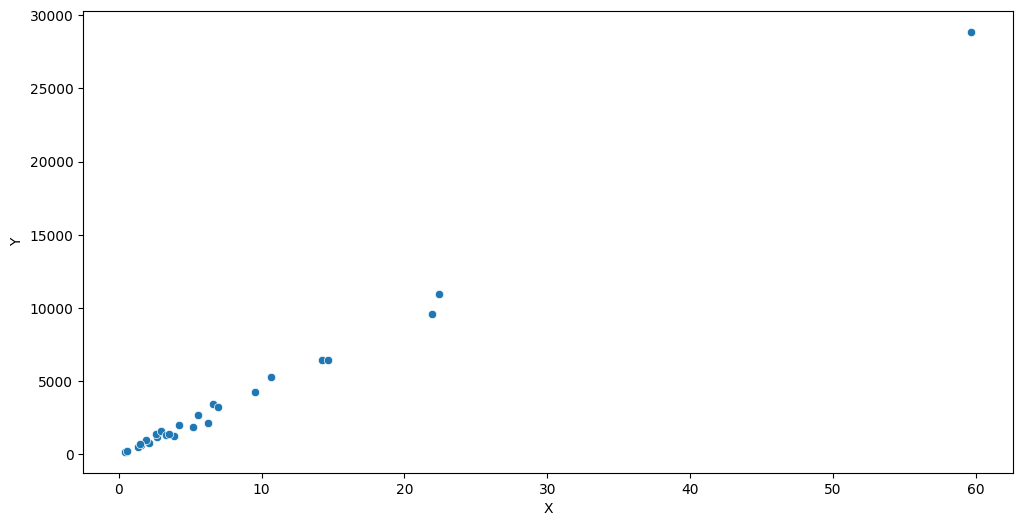

In [64]:
data_set = pd.DataFrame(data_set)
ax = sns.scatterplot(x = data_set['X'], y = data_set['Y'])
ax.figure.set_size_inches(12,6)

In [65]:
import statsmodels.api as sm

Y = data_set['Y']
X = sm.add_constant(data_set['X'])

resultado_regressao_exercicio = sm.OLS(Y,X).fit()
resultado_regressao_exercicio.params

const   -168.321156
X        481.390397
dtype: float64

## <font color=green>4.4 Obtendo previsões</font>
***

# $$\hat{Y}_i = 207,9033 + 0,2973X_i$$

### Previsões dentro da amostra

In [66]:
## Testar se o valor que estamos prevendo está muito distante do valor da amostra (real)
dataset['Y previsto'] = beta_1 + beta_2 * dataset['X']
dataset


,Y,X,Y previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


### Utilizando o statsmodels

In [67]:
dataset['y_previsto_stats_models'] = resultado_regressao.predict() ##faz a mesma coisa que a linha de cima
dataset.head()

,Y,X,Y previsto,y_previsto_stats_models
0,3011,9714,3095.785086,3095.785086
1,1305,3728,1316.203010,1316.203010
2,1879,6062,2010.079483,2010.079483
3,2654,8845,2837.439476,2837.439476
4,2849,8378,2698.604723,2698.604723


In [68]:
dataset.drop(['y_previsto_stats_models'], axis=1, inplace=True)
dataset.head()

,Y,X,Y previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


### Estimando o 'Gasto das Famílias' fora da amostra

In [69]:
def prever(x):
    return beta_1 + beta_2 * x

prever(7510) ## para um x (renda) de 7510, qual meu valor de y (gasto?) 

np.float64(2440.556403140435)

### Estimando o 'Gasto das Famílias' fora da amostra via StatsModels

In [70]:
resultado_regressao.predict([1,7510]) ##passo dois parametros: a constante (1) e o valor de x

array([2440.55640314])

Continuação Exercício:
Considerando os dados do problema anterior, onde se acredita que a posse de computadores tenha uma relação linear com a renda das famílias, após estimarmos o modelo (problema anterior), suponha que seja criado um estado e que este apresente uma renda total de R$ 2.345.678.

Informações extras:

O valor da renda está dividido por 1.000.000, isto é, se um estado tem uma renda total de R$ 4,2, significa que ele tem uma renda total de R$ 4.200.000.

Utilize o ferramental do statsmodels para solucionar o problema.

Assinale a alternativa que apresenta a previsão (valor arredondado) para o número de domicílios que possuem computador neste novo estado da federação.

In [71]:
resultado_regressao_exercicio.predict([1,2.345678])

array([960.86570761])

## <font color=green>4.5 Resíduos</font>
***

Como vimos anteriormente, o resíduo da i-ésima observação é a diferença entre o valor observado de nossa variável dependente ($Y_i$) e o valor estimado da variável dependente ($\hat{Y}_i$).

# $$\hat{u}_i = Y_i - \hat{Y}_i$$

Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

In [72]:
dataset['residuos_calc'] = dataset['Y'] - dataset['Y previsto']
dataset.head()

,Y,X,Y previsto,residuos_calc
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [73]:
dataset['Residuos'] = resultado_regressao.resid
dataset.head()

,Y,X,Y previsto,residuos_calc,Residuos
0,3011,9714,3095.785086,-84.785086,-84.785086
1,1305,3728,1316.203010,-11.203010,-11.203010
2,1879,6062,2010.079483,-131.079483,-131.079483
3,2654,8845,2837.439476,-183.439476,-183.439476
4,2849,8378,2698.604723,150.395277,150.395277


In [74]:
dataset.drop(['residuos_calc'], axis=1, inplace=True)
dataset

,Y,X,Y previsto,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277
5,1068,3338,1200.259640,-132.259640
6,2892,8507,2736.955222,155.044778
7,2543,7947,2570.472435,-27.472435
8,3074,9915,3155.540515,-81.540515
9,849,1632,693.081721,155.918279


In [75]:
dataset['Residuos'].mean()

np.float64(-5.525180313270539e-13)

## <font color=green>4.6 Suposições sobre o termo de erro $u$</font>
***

### 1. O termo de erro $u$ é uma variável aleatória com média igual a zero: $E(u) = 0$
### 2. A variância de $u$ é a mesma para todos os valores de $X$
### 3. O valores de $u$ são independentes
### 4. O termo de erro $u$ é uma variável aleatória normalmente distribuída.

### Plotando os resíduos do modelo

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Text(0.5, 1.0, 'Resíduos vs Variável Independente')

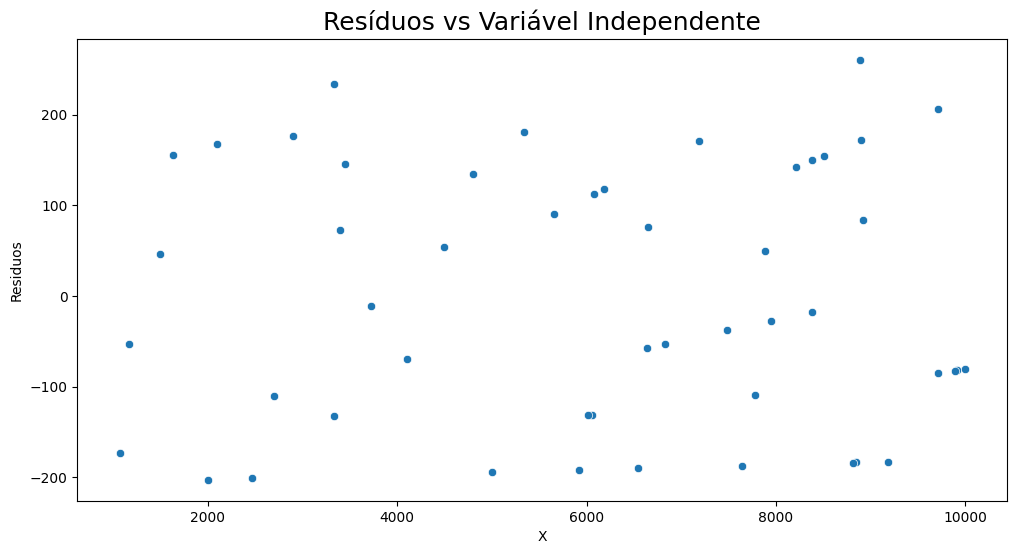

In [76]:
## Faço esse gráfico para enxergar visualmente que é uma variável independente e aleatória.
## Uso o x para casos de regressões lineares SIMPLES, onde só tem 1 variável que depende de Y.
ax = sns.scatterplot(x = dataset['X'], y = dataset['Residuos'])
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos vs Variável Independente', fontsize = 18)

Text(0.5, 1.0, 'Resíduos vs Y previsto')

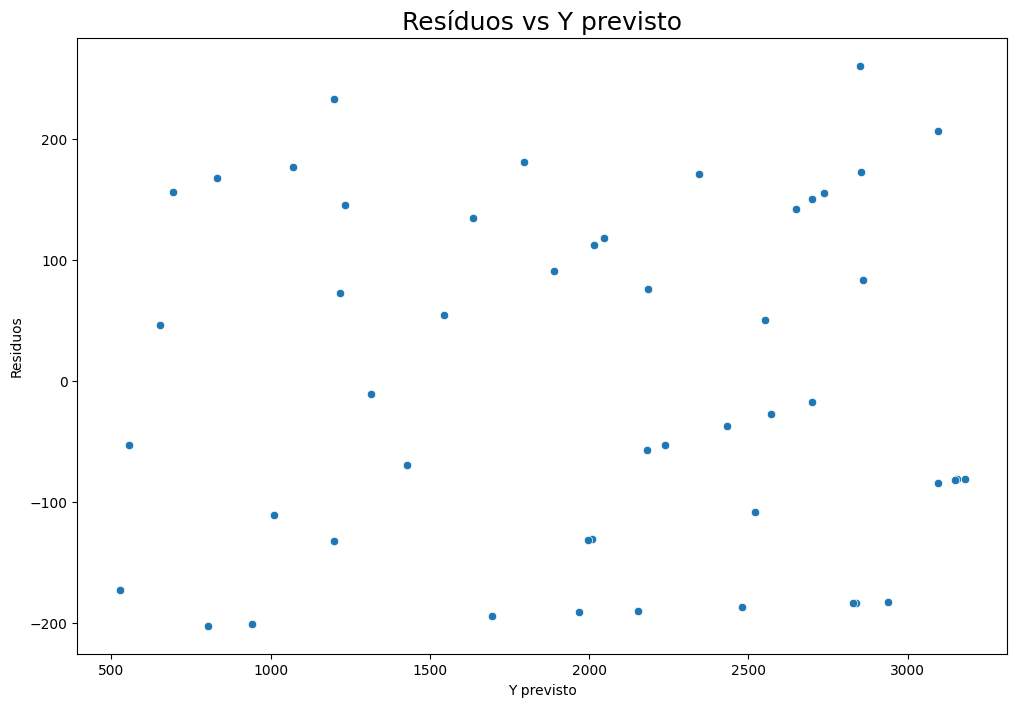

In [77]:
## Para regressões MÚLTIPLAS, faço o gráfico usando o Y previsto, pois se tivesse X,Z,W... que modificasse Y, teria que fazer um pra cada, e o efeito de um não incorporaria o outro

## Como a regressão é simples, o gráfico de resíduos do Y previsto é idêntico ao de X

ax = sns.scatterplot(x = dataset['Y previsto'], y = dataset['Residuos'])
ax.figure.set_size_inches(12,8)
ax.set_title('Resíduos vs Y previsto', fontsize = 18)

### Hipótese de variância constante

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

Text(0.5, 1.0, 'Resíduos ² vs Y Previsto')

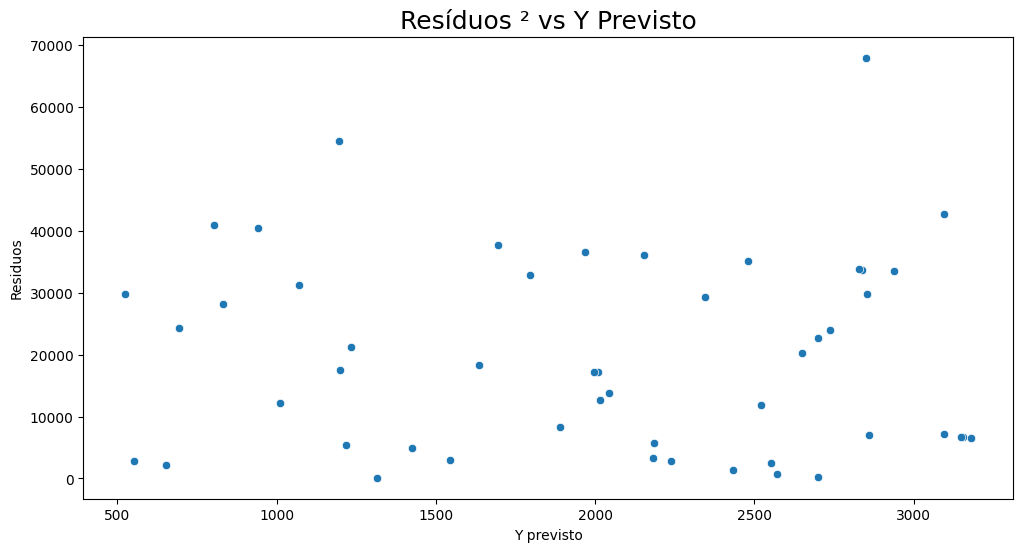

In [78]:
## Percebemos que a variância dos erros é constante, com 2 observações saindo do normal (amostra pequena, n = 50)

##Se a variância dos erros não é constante, a regressão não pode ser aplicada

ax = sns.scatterplot(x = dataset['Y previsto'], y = dataset['Residuos']**2)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos ² vs Y Previsto', fontsize = 18)

## <font color=green>4.7 O coeficiente de determinação $R^2$</font>
***

O **coeficiente de determinação R²** é uma medida resumida que diz quanto a linha de regressão amostral se ajusta aos dados. Pode ser obtido a partir da seguinte fórmula:

# $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

Sabemos que o i-ésimo resíduo representa o erro de usarmos $\hat{Y}_i$ para estimar $Y_i$. A soma dos quadrados desses resíduos é o valor que é minimizado pelo método dos mínimos quadrados. Esse valor pode ser representado da seguinte forma:

# $$SQE = \sum{(Y_i - \hat{Y}_i)^2}$$

O valor da SQE é uma medida do erro de se usar a equação de regressão estimada para estimar os valores da variável dependente na amostra.

Outro componente que podemos medir é a soma dos quadrados total (SQT) que representa a medida do erro envolvido no uso da média ($\bar{Y}$) para fazer as estimativas. A SQT pode ser representada da forma abaixo:

# $$SQT = \sum{(Y_i - \bar{Y})^2}$$

Para quantificar o quanto os valores estimados ($\hat{Y}_i$) se afastam da média ($\bar{Y}$) podemos obter mais uma soma de quadrados. Essa soma é chamada de soma dos quadrados da regressão (SQR) e é representada pela seguinte fórmula:

# $$SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$$


### Soma do quadrados do erros (SQE)

In [79]:
dataset.head()

,Y,X,Y previsto,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [80]:
SQE = dataset['Residuos'].apply(lambda u: u**2).sum()
SQE

np.float64(984986.0375191914)

In [81]:
# Utilizando o ssr (sum of squared residuals) do statsmodels
resultado_regressao.ssr

np.float64(984986.0375191915)

### Soma do quadrados total (SQT)

In [82]:
SQT = dataset['Y'].apply(lambda y: (y - dataset['Y'].mean())**2).sum()
SQT

np.float64(32724149.279999997)

### Soma do quadrados da regressão (SQR)

In [83]:
SQR = dataset['Y previsto'].apply(lambda y_prev: (y_prev - dataset['Y'].mean())**2).sum()
SQR

np.float64(31739163.24248083)

In [84]:
# Utilizando o ess (explained sum of squares) do statsmodels
resultado_regressao.ess

np.float64(31739163.242480807)

### Relação entre as somas de quadrados

# $$SQT = SQR + SQE$$

Onde,


### $SQE = \sum{(Y_i - \hat{Y}_i)^2}$

### $SQT = \sum{(Y_i - \bar{Y})^2}$

### $SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$


<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img029.png" width=50%>

In [85]:
SQR + SQE

np.float64(32724149.28000002)

### Coeficiente de determinação (R²)

A regressão estimada teria um ajuste perfeito se todos os valores da variável dependente ($Y_i$) estiverem sobre a reta de regressão estimada. Quando isso ocorre temos $Y_i - \hat{Y}_i = 0$ para todas as observações, o que resulta em uma $SQE = 0$. Como $SQT=SQR+SQE$, é possível deduzir que para termos um ajuste perfeito $SQT$ deve ser igual a $SQR$ e a razão entre estas medidas ($\frac{SQR}{SQT}$) deve ser igual a 1.

Quando o ajuste não é tão perfeito nota-se que a $SQE$ apresenta valores maiores o que faz a razão $\frac{SQR}{SQT}$ diminuir, e em uma situação de total imperfeição do ajuste teríamos uma $SQR=0$ e $SQE=SQT$ levando a $\frac{SQR}{SQT}=0$.

A razão $\frac{SQR}{SQT}$, que assume valores entre 0 e 1, é utilizada como medida de eficiência do ajuste da equação de regressão estimada. Essa medida é conhecida como coeficiente de determinação (R²).

# $$R^2 = \frac{SQR}{SQT}$$

## <font color='red'>Observação</font>
> Somente com a utilização do R² não é possível tirar conclusões sobre a relação entre $Y$ e $X$ ser ou não ser estatisticamente
significativa. Este tipo de afirmação deve basear-se em considerações que envolvem o tamanho da amostra e as propriedades da distribuição amostral dos estimadores mínimos quadrados.

In [86]:
R2 = SQR / SQT
R2

np.float64(0.9699003317369304)

In [87]:
resultado_regressao.rsquared

np.float64(0.9699003317369297)

In [88]:
resultado_regressao_exercicio.rsquared

np.float64(0.9967917066613234)

## <font color=green>4.8 Testes aplicados a modelos de regressão</font>
***

Como vimos, em uma regressão linear simples, a média da variável dependente ($Y$) é uma função linear da variável independente ($X$):

# $$Y_i = \beta_1 + \beta_2X_i$$

Se o valor de $\beta_2$ for zero podemos verificar que o valor médio de $Y$ não depende do valor de $X$ e, portanto, concluímos que $X$ e $Y$ não estão linearmente relacionados. De forma alternativa, se o valor de $\beta_2$ não for igual a zero, concluímos que as duas variáveis estão relacionadas.

Para testar se a relação de regressão é significativa, é preciso realizar um **teste de hipóteses** para determinar se o valor de $\beta_2$ é zero. Antes de realizar este tipo de teste precisamos obter uma estimativa para $\sigma^2$ (variância do erro).

Ou seja, faremos um teste t de hipoteses onde H0: B2 = 0 e H1: B2 <> 0

### Output do modelo de regressão estimado

In [89]:
## Teste F-statistic: utilizado para regressões múltiplas
## P > |t| é o p-valor
## Ao lado temos o intervalo de confiança
## R² em cima

print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           3.56e-38
Time:                        17:23:18   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

### Erro quadrático médio - estimativa de $\sigma^2$

Lembre-se que a **soma dos quadrados do erros (SQE)** é uma medida numérica da variabilidade dos dados observados em torno da reta de regressão estimada. Todas as somas de quadrados, estudadas anteriormente, estão associadas a um determinado número de graus de liberdade. No caso da SQE, como devem ser estimados dois parâmetros, temos $n-2$ graus de liberdade.

O **erro quadrático médio**, representado pela equação abaixo, pode ser obtido dividindo-se a SQE por $n-2$ graus de liberdade.

# $$EQM = \frac{SQE}{n-2}$$

In [90]:
SQE

np.float64(984986.0375191914)

In [91]:
n

50

In [92]:
EQM = SQE / ( n-2)
EQM

np.float64(20520.542448316486)

In [93]:
## Isso é variância dos erros !! 

resultado_regressao.mse_resid

np.float64(20520.54244831649)

In [94]:
resultado_regressao_exercicio.mse_resid

np.float64(110564.3756996659)

### Teste de hipótese para nulidade do coeficiente angular

Considere o seguinte modelo de regressão linear simples:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Se as variáveis $Y$ e $X$ são linearmente relacionadas, espera-se que $\beta_2$ seja diferente de zero. Para testar esta hipótese formulamos um teste de hipótese com a seguinte especificação de hipóteses nula e alternativa:

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$

Caso $H_0$ seja rejeitada, concluiremos que existe uma relação linear estatisticamente significativa entre as duas variáveis.

Considere agora que $b_1$ e $b_2$ são nossos estimadores de mínimos quadrados. Considere que a distribuição amostral de $b_2$ segue uma normal e também as seguintes propriedades:

# $$E(b_2) = \beta_2$$
# $$\sigma_{b_2} = \frac{\sigma}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Como não conhecemos o valor de $\sigma$, utilizamos $s$ como estimativa:

# $$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Note que o valor esperado de $b_2$ é $\beta_2$, logo, $b_2$ é um estimador não viesado de $\beta_2$. Abaixo temos a estatística de teste (t) que segue uma distribuição t de Student com $n-2$ graus de liberdade.

# $$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

### Calculando $s$

In [95]:
s = np.sqrt(EQM)
s

np.float64(143.24993001155877)

### Calculando $\sum{(X_i - \bar{X})^2}$

In [96]:
soma = dataset['X'].apply(lambda x: (x - dataset['X'].mean()) **2).sum()

### Calculando $s_{b_2}$

In [97]:
sb2 = s / np.sqrt(soma)
sb2

np.float64(0.00755923753376846)

### Determinando as áreas de aceitação e rejeição de $H_0$

In [98]:
from scipy.stats import t as t_student

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img031.png)

### Níveis de confiança e significância

In [99]:
confianca = 0.95
significancia = 1 - confianca

In [100]:
graus_de_liberdade = resultado_regressao.df_resid ## outro jeito de fazer o n-2
graus_de_liberdade 

np.float64(48.0)

### Obtendo $t_{\alpha/2}$

In [101]:
t_alpha_2 = t_student.ppf(0.95 + 0.05/2,graus_de_liberdade)
t_alpha_2

np.float64(2.010634757624232)

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img032.png)

### Obtendo $t = \frac{b_2 - \beta_2}{s_{b_2}}$

In [102]:
beta_2 ## coeficiente calculado pela regressão

np.float64(0.29729069099372435)

In [103]:
t = (beta_2 - 0 ) / sb2  ## O Beta grande 2 é o que está no teste. Estou testante se esse coeficiente é zero
t

np.float64(39.328131926755034)

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img033.png)

### Etapas e regras de decisão do teste t de significância dos parâmetros

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img030.png" width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $t \leq -t_{\alpha / 2}$ ou se $t \geq t_{\alpha / 2}$

In [104]:
t <= - t_alpha_2

np.False_

In [105]:
t >= t_alpha_2

np.True_

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [106]:
p_valor = t_student.sf(t, graus_de_liberdade) * 2 ##vezes dois pois o teste é bicaudal
p_valor

np.float64(3.5555432285858875e-38)

In [107]:
resultado_regressao.pvalues

const    1.362270e-04
X        3.555543e-38
dtype: float64

In [108]:
p_valor = resultado_regressao.pvalues[1]
p_valor

C:\Users\LMMARTINHO\AppData\Local\Temp\ipykernel_16092\911925625.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = resultado_regressao.pvalues[1]


np.float64(3.5555432285859883e-38)

### <font color='green'>Conclusão: Rejeitamos $H_0$ e concluímos que existe uma relação significativa entre as duas variáveis.</font>

In [109]:
p_valor <= significancia

np.True_

---

### Teste F

O teste F também é uma ferramenta para testar a significância na regressão. Baseado na distribuição F de probabilidade, o teste F é utilizado para verificar a significância global na regressão, isto é, em uma regressão múltipla, onde existe mais de uma variável independente, o teste F verifica a nulidade de todos os parâmetros do modelo conjuntamente.

Em nosso caso (regressão linear simples) ele fornece a mesma conclusão obtida com o teste t.

**Hipóteses:**

## $H_0: \beta_2 = 0$
## $H_0: \beta_2 \neq 0$

**Estatística de teste:**

# $$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

Onde,

$SQR$ - soma dos quadrados da regressão

$SQE$ - soma dos quadrados dos erros

$k$ - total de variáveis independentes ($X$)

**Regras de rejeição de $H_0$:**

**Critério do valor crítico** $\rightarrow$ Rejeitar se $F \geq F_{\alpha}$

Onde,

$F_{\alpha}$ - baseia-se na distribuição F com $k$ graus de liberdade no numerador e $n-k-1$ no denominador.

**Critério do p-valor** $\rightarrow$ Rejeitar se $p-valor \leq \alpha$

### Calculando a estatística de teste ($F$)

In [111]:
resultado_regressao.mse_model   ##resultado do numerador

np.float64(31739163.242480807)

In [112]:
resultado_regressao.mse_resid #resultado do denominador

np.float64(20520.54244831649)

In [114]:
F = resultado_regressao.mse_model  / resultado_regressao.mse_resid
F

np.float64(1546.7019608482472)

In [115]:
resultado_regressao.fvalue

np.float64(1546.7019608482472)

### Obtendo o p-valor

In [116]:
resultado_regressao.f_pvalue

np.float64(3.5555432285860253e-38)

In [118]:
## distribuição F no sicpy
from scipy.stats import f

In [119]:
p_valor = f.sf (F, 1, 48) ##estatística de teste, k e n-2
p_valor

np.float64(3.5555432285860253e-38)

In [120]:
p_valor <= 0.05

np.True_

# <font color=green>5 EXTRAS</font>
***

## <font color=green>5.1 Outros testes</font>
***

In [121]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Tue, 27 Jan 2026   Prob (F-statistic):           3.56e-38
Time:                        17:45:12   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

### Normalidade dos resíduos - Omnibus

> ### $H_0:$ Os dados se distribuem como uma normal

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [122]:
from scipy.stats import normaltest

In [124]:
statistic, p_valor = normaltest(dataset['Residuos'])
print(p_valor)

1.101245102459346e-05


In [125]:
p_valor <= 0.05

np.True_

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

In [129]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

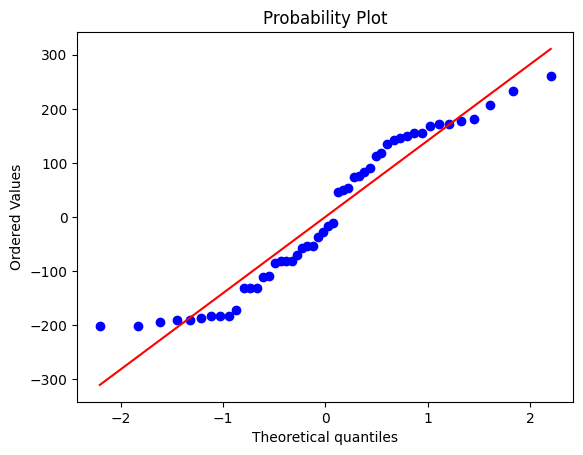

In [131]:
(_,(_,_,_)) = probplot(dataset['Residuos'], plot = plt)

## Esse gráfico no eixo x mostra os quantiles de uma distribuição normal teórica e o eixo y os valores dos resíduos. Se os resíduos apresentassem uma distribuição normal,
## os pontos azuis estariam exatamente em cima da linha vermelha.

<Axes: >

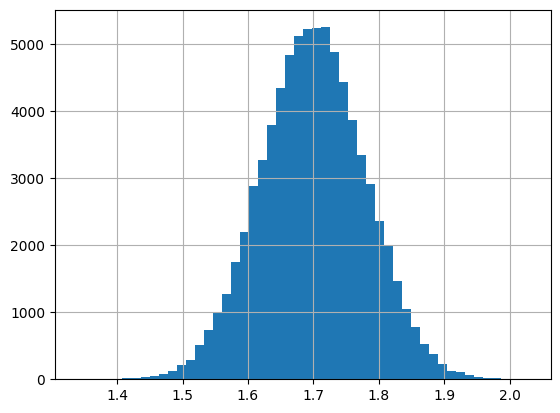

In [134]:
## Exemplo de uma variável que foi construída manualmente para ser uma normal
dados['Altura'].hist(bins = 50)

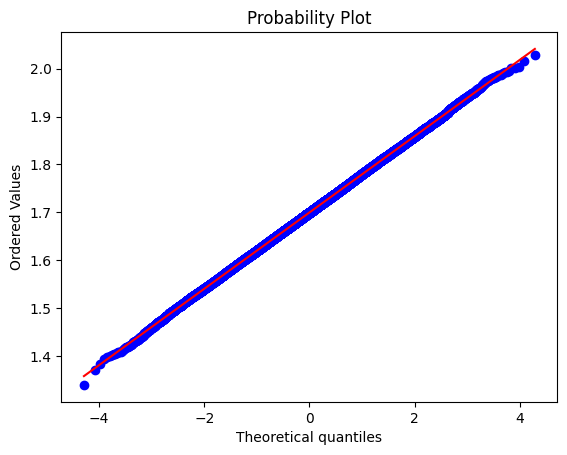

In [132]:
(_,(_,_,_)) = probplot(dados['Altura'], plot = plt)

### Verificando a simetria

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [135]:
from scipy.stats import skew

In [151]:
S = skew(dataset['Residuos'])
S

np.float64(0.07306920116444166)

### Verificando a curtose

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

In [152]:
from scipy.stats import kurtosis

C = 3 + kurtosis(dataset['Residuos'])   
print(C)

1.6369621580686435


### Normalidade dos resíduos - Jarque-Bera (statsmodels)

> ### $H_0:$ Os dados se distribuem como uma normal

> ### Estatística de teste
> ### $$JB = \frac{n}{6}(S^2 + \frac{1}{4}(C - 3)^2)$$
> #### Onde,
> #### $n$ - número de observações
> #### $S$ - Coeficiente de assimetria
> #### $C$ - Coeficiente de curtose

In [141]:
JB = (n / 6.) * (S ** 2 + (1 / 4.) * (C - 3) ** 2)
JB

np.float64(3.915059564941934)

In [142]:
from scipy.stats import chi2

p_valor = chi2.sf(JB, 2)
p_valor

np.float64(0.14120680197285554)

In [143]:
p_valor <= 0.05

np.False_

### Normalidade dos resíduos - Jarque-Bera (Correção)

> ### $H_0:$ Os dados se distribuem como uma normal

> ### Estatística de teste
> ### $$JB = \frac{n-k}{6}(S^2 + \frac{1}{4}(C - 3)^2)$$
> #### Onde,
> #### $n$ - número de observações
> #### $k$ - número de parâmetros do modelo
> #### $S$ - Coeficiente de assimetria
> #### $C$ - Coeficiente de curtose

In [153]:
JB = ((n - 1) / 6.) * (S ** 2 + (1 / 4.) * (C - 3) ** 2)
JB

np.float64(3.836758373643095)

In [149]:
from scipy.stats import chi2

p_valor = chi2.sf(JB, 2)
p_valor

np.float64(0.14684477730154327)

In [147]:
p_valor <= 0.05

np.False_